In [43]:
! pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


#Importation des packages

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


#Lister les modeles

1. **KNN par classification**

2. **Decision tree par classification**

3. **SVM par classification**

4. **Regression Logistique**

5. **Random Forest par classification**

#Charger le jeu de donnees

In [2]:
df = pd.read_csv('creditcarddata.csv')

In [3]:
df.head()


,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
0,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
1,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
2,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
3,0,56,1,0,1,1109976,1811,0.0062,1,0,3,11020290,1,0
4,0,56,1,0,1,1109976,1811,1.0354,1,0,3,11020290,1,0


In [4]:
df.shape

(2266, 14)

In [5]:
df.describe()

,Gender,Age,HouseTypeID,ContactAvaliabilityID,HomeCountry,AccountNo,CardExpiryDate,TransactionAmount,TransactionCountry,LargePurchase,ProductID,CIF,TransactionCurrencyCode,PotentialFraud
count,2266.00000,2266.000000,2266.000000,2266.000000,2266.0,2.266000e+03,2266.000000,2266.000000,2266.0,2266.000000,2266.000000,2.266000e+03,2266.0,2266.000000
mean,0.30053,32.703883,0.471756,1.049426,1.0,7.430469e+06,2073.290380,45.039090,1.0,0.003089,2.711827,1.113007e+07,1.0,0.111650
std,0.45859,18.020767,0.499312,0.856211,0.0,1.308356e+06,63.267542,90.811319,0.0,0.055506,0.486835,2.567096e+05,0.0,0.315005
min,0.00000,2.000000,0.000000,0.000000,1.0,1.109976e+06,1706.000000,0.000000,1.0,0.000000,1.000000,1.023500e+07,1.0,0.000000
25%,0.00000,17.000000,0.000000,0.000000,1.0,7.627307e+06,2101.000000,1.526750,1.0,0.000000,2.000000,1.113235e+07,1.0,0.000000
50%,0.00000,33.000000,0.000000,1.000000,1.0,7.698046e+06,2102.000000,10.772500,1.0,0.000000,3.000000,1.124670e+07,1.0,0.000000
75%,1.00000,50.000000,1.000000,2.000000,1.0,7.805829e+06,2105.000000,37.200000,1.0,0.000000,3.000000,1.126767e+07,1.0,0.000000
max,1.00000,63.000000,1.000000,2.000000,1.0,7.995399e+06,2109.000000,976.500000,1.0,1.000000,3.000000,1.132926e+07,1.0,1.000000


#Data Preprocessing

**1. Identification des valeurs manquantes**

In [6]:
df.isna().sum()

Gender                     0
Age                        0
HouseTypeID                0
ContactAvaliabilityID      0
HomeCountry                0
AccountNo                  0
CardExpiryDate             0
TransactionAmount          0
TransactionCountry         0
LargePurchase              0
ProductID                  0
CIF                        0
TransactionCurrencyCode    0
PotentialFraud             0
dtype: int64

**On constate que le jeu de donnees ne contient pas des valeur manquantes**

**2. Identification des doublons**

In [7]:
print(df.duplicated().sum())

933


In [8]:
df = df.drop_duplicates()

In [9]:
print(df.duplicated().sum())

0


3. **Identification des valeurs aberrantes**

<Axes: ylabel='Age'>

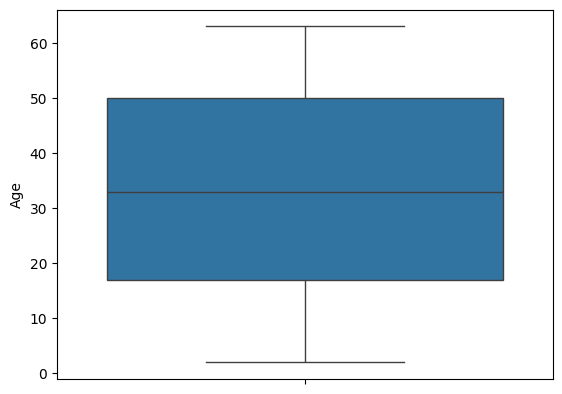

In [10]:
sns.boxplot(df.Age)

La variable Age ne contient pas des valeurs aberrantes.

<Axes: ylabel='TransactionAmount'>

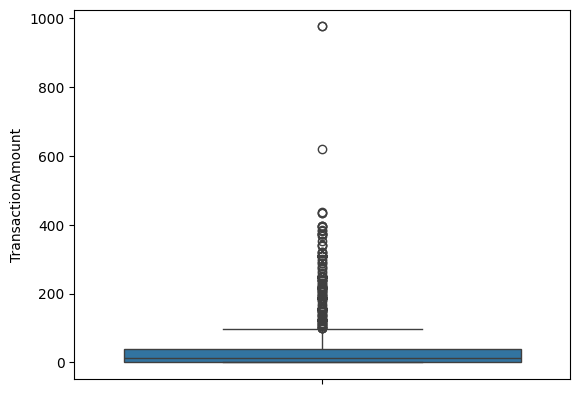

In [11]:
sns.boxplot(df.TransactionAmount)

La variable  TransactionAmount  contient  des valeurs aberrantes et la distribution n'est pas normale.

**Correction des valeurs aberrante**

In [12]:
# Correction des valeurs aberrantes sur TransactionAmount uniquement
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Clipper les valeurs extrêmes
df['TransactionAmount'] = df['TransactionAmount'].clip(lower=(Q1 - 1.5 * IQR),
                                                      upper=(Q3 + 1.5 * IQR))

df_new = df.copy()


<Axes: ylabel='TransactionAmount'>

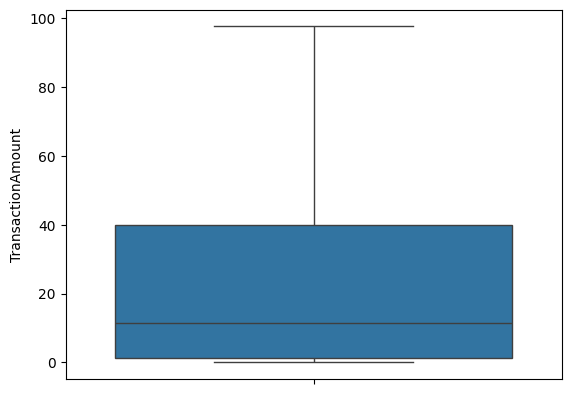

In [13]:
sns.boxplot(df_new.TransactionAmount)

In [38]:
df_new.shape

(1333, 14)

#Identification de desequibres(unbalanced) des classe

C:\Users\diall\AppData\Local\Temp\ipykernel_15180\2579833562.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PotentialFraud', data=df_new, palette='Set2')


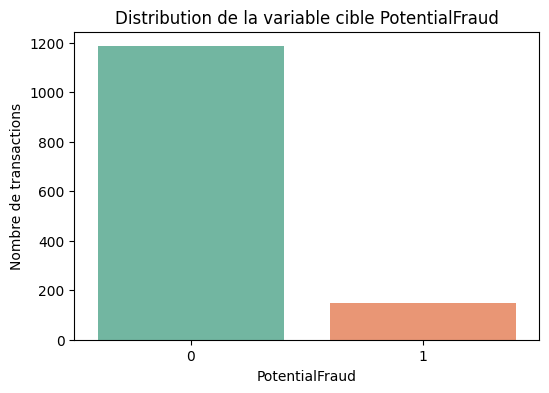

PotentialFraud
0    0.888972
1    0.111028
Name: proportion, dtype: float64


In [61]:


plt.figure(figsize=(6,4))
sns.countplot(x='PotentialFraud', data=df_new, palette='Set2')
plt.title('Distribution de la variable cible PotentialFraud')
plt.xlabel('PotentialFraud')
plt.ylabel('Nombre de transactions')
plt.show()

# Afficher les proportions
proportions = df_new['PotentialFraud'].value_counts(normalize=True)
print(proportions)


La variable cible PotentialFraud est très déséquilibrée :

0 (non fraude) → 88,9 %

1 (fraude) → 11,1 %

#Separation des donnees

In [41]:
x=df_new.drop('PotentialFraud', axis=1)
y=df_new['PotentialFraud']


#Division des donnees

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

correction des deéquilibres des classes avec la methodes SMOTE


In [45]:
#  Corriger le déséquilibre avec SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("\nAvant SMOTE :")
print(y_train.value_counts())
print("Après SMOTE :")
print(y_train_res.value_counts())


Avant SMOTE :
PotentialFraud
0    834
1     99
Name: count, dtype: int64
Après SMOTE :
PotentialFraud
0    834
1    834
Name: count, dtype: int64


pipeline


In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
pipeline_numeric = make_pipeline(StandardScaler())
pipeline_categorical = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
processor= make_column_transformer((pipeline_numeric, ['Gender', 'Age', 'HouseTypeID', 'ContactAvaliabilityID', 'HomeCountry', 'AccountNo', 'CardExpiryDate', 'TransactionAmount', 'TransactionCountry', 'LargePurchase', 'ProductID', 'CIF', 'TransactionCurrencyCode',]),
                                   (pipeline_categorical, ['PotentialFraud']))

#Apprentissage des modeles lister ci-dessu

In [46]:
# KNN par classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier()

In [49]:
# regression logistique par classification
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(X_train_res, y_train_res)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [48]:
# SVM par classification
svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_res, y_train_res)


SVC(class_weight='balanced', probability=True, random_state=42)

In [47]:
# Decision Tree par classification
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_res, y_train_res)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [50]:
# Random Forest par classification
rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

#Evaluation des modeles

In [51]:
# Matrice de confusion pour KNN
y_pred_knn = knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# performance KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)   
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
print(f"KNN - Accuracy: {accuracy_knn}, Precision: {precision_knn}, Recall: {recall_knn}")


KNN - Accuracy: 0.725, Precision: 0.18556701030927836, Recall: 0.3673469387755102


In [52]:
# Matrice de confusion pour la regression logistique
y_pred_log_reg = log_reg.predict(x_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
# performance regression logistique
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}")



Logistic Regression - Accuracy: 0.6325, Precision: 0.1597222222222222, Recall: 0.46938775510204084


In [54]:
# Matrice de confusion pour SVM
y_pred_svm = svm.predict(x_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
# performance SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)  
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
print(f"SVM - Accuracy: {accuracy_svm}, Precision: {precision_svm}, Recall: {recall_svm}") 




SVM - Accuracy: 0.85, Precision: 0.0, Recall: 0.0


In [55]:
# Matrice de confusion pour Decision Tree
y_pred_dt = dt.predict(x_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
# performance Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}")



Decision Tree - Accuracy: 0.7575, Precision: 0.15714285714285714, Recall: 0.22448979591836735


In [57]:
# Matrice de confusion pour Random Forest
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
# performance Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}")

Random Forest - Accuracy: 0.7475, Precision: 0.15789473684210525, Recall: 0.24489795918367346


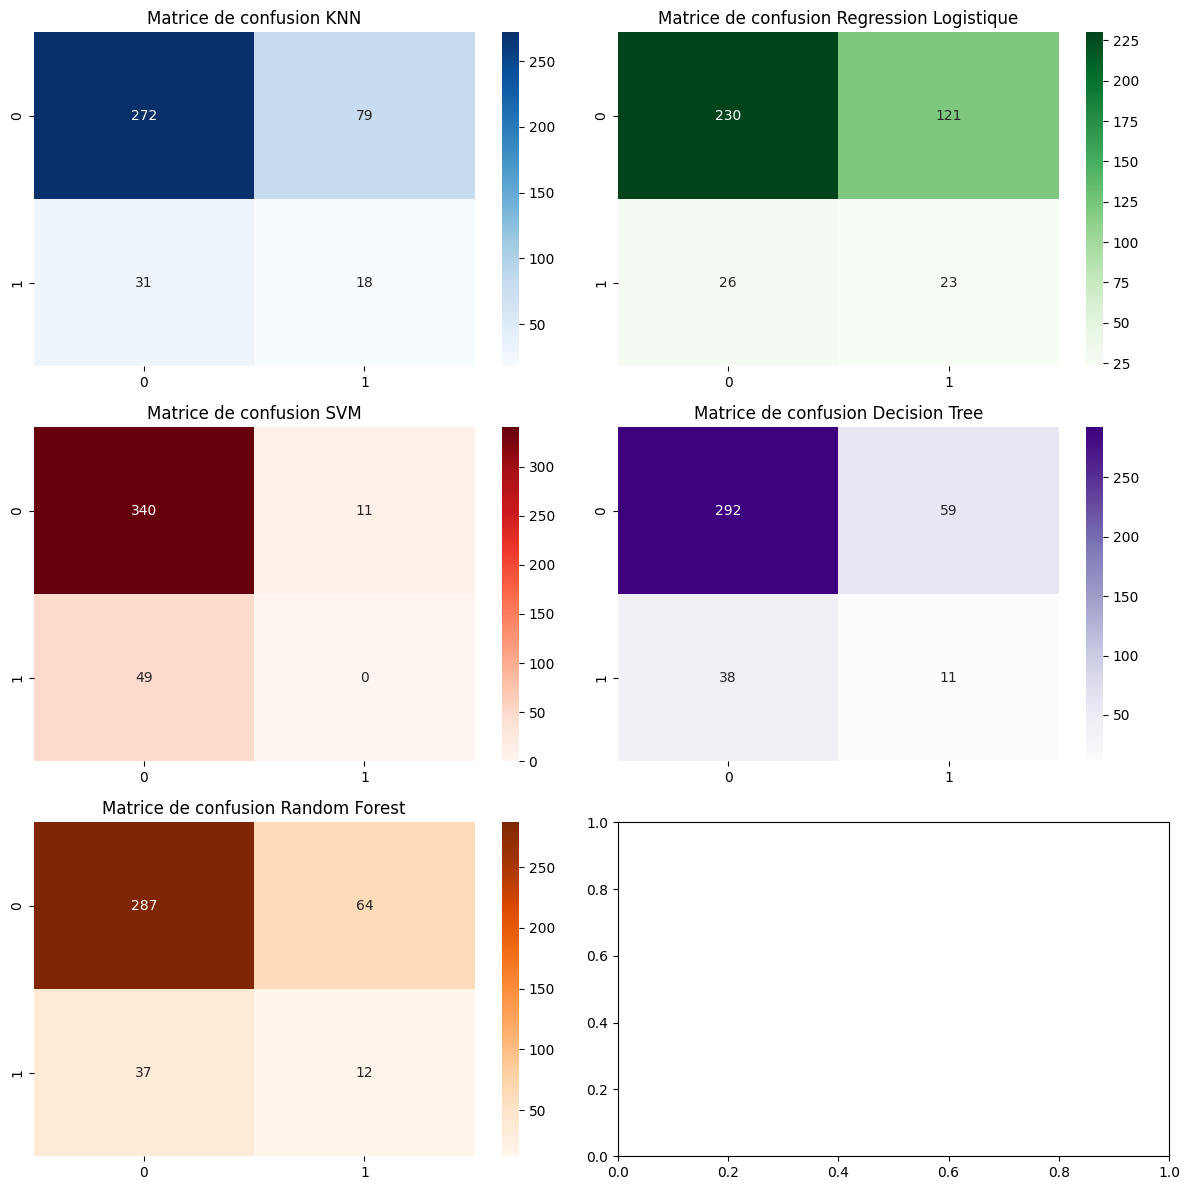

In [58]:
# Affichage des matrices de confusion
fig, axes = plt.subplots(3, 2, figsize=(12, 12)) 
sns.heatmap(cm_knn, annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Matrice de confusion KNN')
sns.heatmap(cm_log_reg, annot=True, fmt='d', ax=axes[0, 1], cmap='Greens')
axes[0, 1].set_title('Matrice de confusion Regression Logistique')
sns.heatmap(cm_svm, annot=True, fmt='d', ax=axes[1, 0], cmap='Reds')
axes[1, 0].set_title('Matrice de confusion SVM')
sns.heatmap(cm_dt, annot=True, fmt='d', ax=axes[1, 1], cmap='Purples')
axes[1, 1].set_title('Matrice de confusion Decision Tree')
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[2, 0], cmap='Oranges')
axes[2, 0].set_title('Matrice de confusion Random Forest')
plt.tight_layout()
plt.show()

#Etude de comparaison des modeles

In [59]:
performance_df = pd.DataFrame({
    'Model': [ 'Logistic Regression','KNN', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_log_reg,accuracy_knn , accuracy_svm, accuracy_dt, accuracy_rf],
    'Precision': [ precision_log_reg,precision_knn, precision_svm, precision_dt, precision_rf], 
    'Recall': [recall_log_reg, recall_knn , recall_svm, recall_dt, recall_rf]
})
performance_df

,Model,Accuracy,Precision,Recall
0,Logistic Regression,0.6325,0.159722,0.469388
1,KNN,0.7250,0.185567,0.367347
2,SVM,0.8500,0.000000,0.000000
3,Decision Tree,0.7575,0.157143,0.224490
4,Random Forest,0.7475,0.157895,0.244898


<Axes: xlabel='Model'>

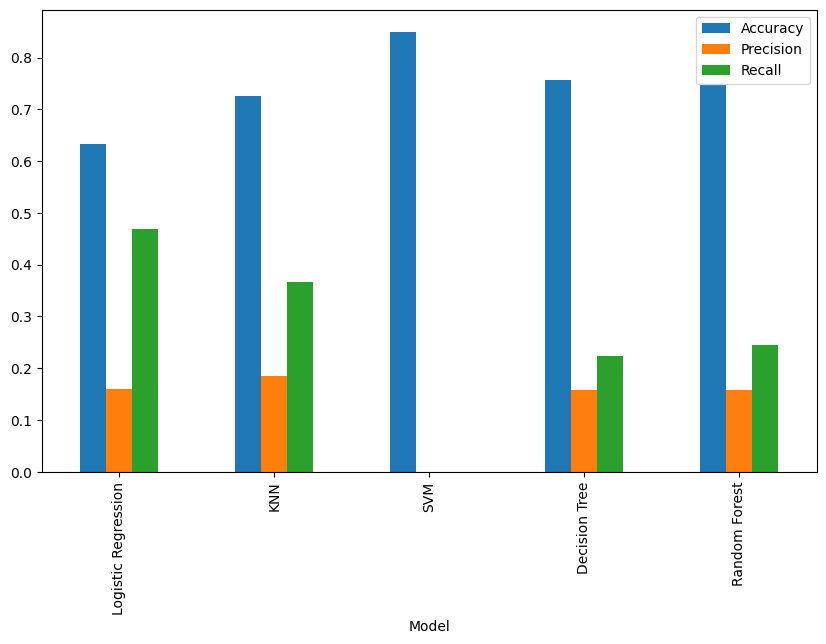

In [60]:
performance_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall'], kind='bar', figsize=(10, 6))

#Enregistrer le meileur modele

In [62]:
import joblib as jb
jb.dump(log_reg, 'log_model.pkl')
#!/usr/bin/env python3

['log_model.pkl']

In [63]:
# pour charger le modele
model = jb.load('log_model.pkl')
model

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)